<a href="https://colab.research.google.com/github/saivaishnav21/LabAssign/blob/main/LabAssign5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Cancer_Data.xlsx to Cancer_Data.xlsx
Dataset Head:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   .

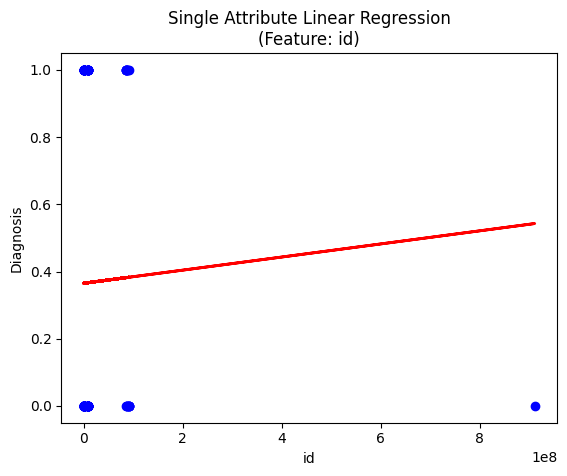


Multiple Attributes Linear Regression Results:
Coefficients: [-3.68249112e-11 -1.96793017e-01  2.94132713e-03  2.25915623e-02
  3.32977579e-04 -3.64939276e-01 -5.01145124e+00  1.01560549e+00
  4.89494129e+00 -3.42591856e-01  5.75962783e+00  4.27783098e-01
 -1.36460242e-02 -8.61662737e-03 -1.18052834e-03  1.83539806e+01
 -2.22937002e+00 -4.28991702e+00  1.83993869e+01 -1.23251050e+00
 -2.93908366e+00  2.14542912e-01  9.63815528e-03 -8.64810003e-03
 -9.62738367e-04  1.05745082e-01  7.64468307e-01  6.16251471e-01
 -1.34497853e+00  1.02792570e+00  1.29064974e+00]
Intercept: -2.0555432080202167
R^2 Score: 0.7274497824485364

KMeans Clustering Results:
Cluster
1    381
0    188
Name: count, dtype: int64


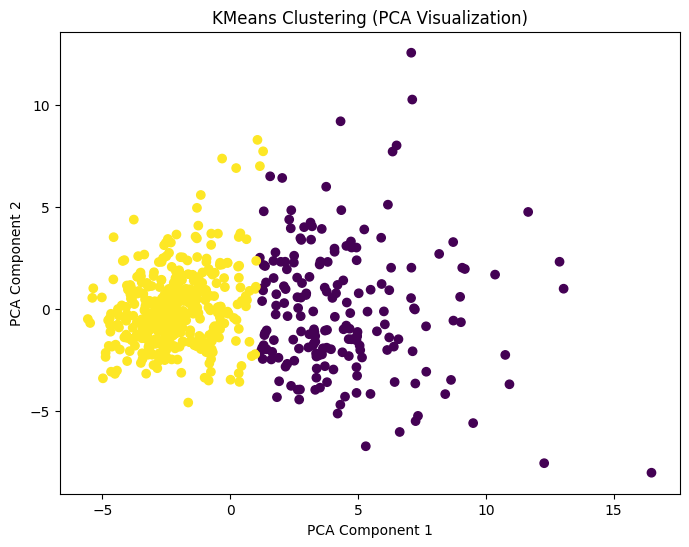

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

# For Google Colab: Uploading the file
from google.colab import files
uploaded = files.upload()

# Load the Dataset
file_name = 'Cancer_Data.xlsx'  # replace with your actual filename if different
df = pd.read_excel(file_name)

# Show the first few rows
print("Dataset Head:")
print(df.head())

# Check datatypes
print("\nData Types Before Encoding:")
print(df.dtypes)

# Encode Categorical Columns
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

print("\nData Types After Encoding:")
print(df.dtypes)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Separate features and target
# Assuming 'diagnosis' is the target column (adjust if different)
if 'diagnosis' in df.columns:
    X = df.drop(['diagnosis'], axis=1)
    y = df['diagnosis']
else:
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ======================
# Linear Regression (Single Attribute)
# ======================
def linear_regression_single_attribute(X_train, y_train, X_test, y_test, attribute_index):
    lr = LinearRegression()

    # Train only on one feature
    X_train_single = X_train.iloc[:, [attribute_index]]
    X_test_single = X_test.iloc[:, [attribute_index]]

    lr.fit(X_train_single, y_train)
    y_pred = lr.predict(X_test_single)

    print(f"\nSingle Attribute Linear Regression (Attribute Index {attribute_index}):")
    print("Coefficients:", lr.coef_)
    print("Intercept:", lr.intercept_)
    print("R^2 Score:", lr.score(X_test_single, y_test))

    # Plot
    plt.scatter(X_test_single, y_test, color='blue')
    plt.plot(X_test_single, y_pred, color='red', linewidth=2)
    plt.title(f'Single Attribute Linear Regression\n(Feature: {X_train.columns[attribute_index]})')
    plt.xlabel(X_train.columns[attribute_index])
    plt.ylabel('Diagnosis')
    plt.show()

# Run Single Attribute Regression
linear_regression_single_attribute(X_train, y_train, X_test, y_test, attribute_index=0)

# ======================
# Linear Regression (Multiple Attributes)
# ======================
def linear_regression_multiple_attributes(X_train, y_train, X_test, y_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    print("\nMultiple Attributes Linear Regression Results:")
    print("Coefficients:", lr.coef_)
    print("Intercept:", lr.intercept_)
    print("R^2 Score:", lr.score(X_test, y_test))

# Run Multiple Attribute Regression
linear_regression_multiple_attributes(X_train, y_train, X_test, y_test)

# ======================
# KMeans Clustering
# ======================
def kmeans_clustering(X, num_clusters=2):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)

    df['Cluster'] = kmeans.labels_

    print("\nKMeans Clustering Results:")
    print(df['Cluster'].value_counts())

    # Visualize Clusters (PCA for 2D visualization)
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    components = pca.fit_transform(X_scaled)

    plt.figure(figsize=(8,6))
    plt.scatter(components[:, 0], components[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.title('KMeans Clustering (PCA Visualization)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Run KMeans Clustering
kmeans_clustering(X, num_clusters=2)